In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import joblib

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.replace(to_replace='3+',value=4,inplace=True)

<Axes: xlabel='Gender', ylabel='count'>

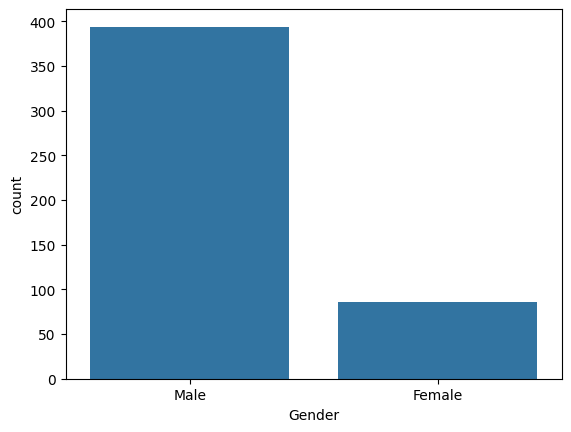

In [9]:
sns.countplot(x='Gender' , data=df)

<Axes: xlabel='Education', ylabel='count'>

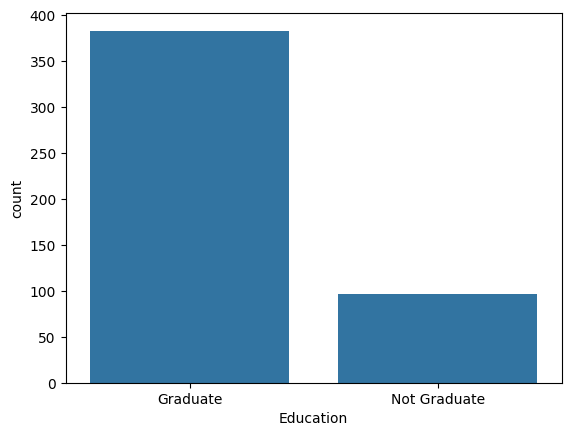

In [10]:
sns.countplot(data=df,x='Education')

In [11]:
df.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0},
                     'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1, 'Urban':2},
                      'Education':{'Graduate':1, 'Not Graduate':0},'Loan_Status':{'Y':1 , 'N':0}}, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\510950300.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0},


In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [13]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# List of columns to normalize
columns_to_normalize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Apply Min-Max scaling to the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df[columns_to_normalize].head())

   ApplicantIncome  CoapplicantIncome  LoanAmount
1         0.054830           0.044567    0.201354
2         0.035250           0.000000    0.096447
3         0.030093           0.069687    0.187817
4         0.072356           0.000000    0.223350
5         0.065145           0.124006    0.436548


In [14]:
X=df.drop(['Loan_Status','Loan_ID'],axis=1)
y=df.Loan_Status

In [15]:
# Apply a combination of SMOTE and Edited Nearest Neighbors
smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X, y)

In [16]:
print(X.shape)
print(pd.Series(y).value_counts())

# Check the shape of the resampled data
print(X_balanced.shape)
print(pd.Series(y_balanced).value_counts())

(480, 11)
Loan_Status
1    332
0    148
Name: count, dtype: int64
(330, 11)
Loan_Status
1    170
0    160
Name: count, dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

In [18]:
# Train the model
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.92      0.98      0.95        46

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



In [19]:
# Train the model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.95      0.87      0.91        46

    accuracy                           0.92        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.92      0.92      0.92        99



In [20]:
# Train the model
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        53
           1       0.82      0.98      0.89        46

    accuracy                           0.89        99
   macro avg       0.90      0.89      0.89        99
weighted avg       0.90      0.89      0.89        99



In [21]:
# Train the model
model_lr = LogisticRegression(max_iter=100)
model_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        53
           1       0.82      1.00      0.90        46

    accuracy                           0.90        99
   macro avg       0.91      0.91      0.90        99
weighted avg       0.92      0.90      0.90        99



C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
joblib.dump(model_rf, 'rf_model.joblib')
joblib.dump(model_dt, 'dt_model.joblib')
joblib.dump(model_gnb, 'gnb_model.joblib')
joblib.dump(model_lr, 'lr_model.joblib')

['lr_model.joblib']

In [25]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 20FB-8195

 Directory of D:\workspace\loan_prediction

06-04-2025  15:57    <DIR>          .
06-04-2025  15:20    <DIR>          ..
06-04-2025  15:23    <DIR>          .ipynb_checkpoints
06-04-2025  14:54            38,013 dataset.csv
06-04-2025  15:57             4,585 dt_model.joblib
06-04-2025  15:57             1,639 gnb_model.joblib
06-04-2025  15:24            64,950 loan-predication-model-98.ipynb
06-04-2025  15:24           194,495 loan-predication.ipynb
06-04-2025  15:57             1,455 lr_model.joblib
06-04-2025  15:24            98,113 ml-loan-status-prediction.ipynb
06-04-2025  15:57           437,129 rf_model.joblib
06-04-2025  15:57            63,420 Untitled.ipynb
               9 File(s)        903,799 bytes
               3 Dir(s)  125,331,955,712 bytes free


In [26]:
joblib.dump(scaler, 'scaler_minmax.joblib')

['scaler_minmax.joblib']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    float64
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 52.5+ KB


In [28]:
df['Dependents'].unique()

array(['1', '0', '2', 4], dtype=object)

In [34]:
for i in df.columns:
    if i == "Loan_ID":
        continue
    print(i,df[i].unique())

Gender [1 0]
Married [1 0]
Dependents ['1' '0' '2' 4]
Education [1 0]
Self_Employed [0 1]
ApplicantIncome [0.05482993 0.03525046 0.03009276 0.07235622 0.06514533 0.02700062
 0.03569573 0.04769326 0.1569697  0.03772418 0.03615337 0.0210637
 0.0142115  0.0593692  0.04155844 0.05858998 0.09288806 0.07179963
 0.03030303 0.11638837 0.03276438 0.05041435 0.01598021 0.03731602
 0.05617811 0.04143476 0.15275201 0.04350031 0.04967223 0.04450216
 0.04267161 0.02040816 0.0468893  0.06801484 0.07014224 0.03085962
 0.04761905 0.02199134 0.03631416 0.05046382 0.0552381  0.14038343
 0.03163884 0.02451453 0.03977737 0.09808287 0.03966605 0.02906617
 0.03560915 0.03041435 0.06896722 0.13110699 0.08596166 0.05132962
 0.03782313 0.02133581 0.06327767 0.0445269  0.0105133  0.04571429
 0.01518862 0.04747062 0.02740878 0.104094   0.0685838  0.03473098
 0.07544836 0.03862709 0.04926407 0.04291899 0.02886827 0.0225974
 0.04994434 0.01990105 0.0511812  0.05804576 0.03589363 0.13935683
 0.04514533 0.02376005 0.